### Compare solver 

In [14]:
import fenics
import numpy as np
import matplotlib.pyplot as plt
import typing
from typing import Callable, Tuple, List, Union
import pickle
from solver_alix import solver_para, solver_run
import time

from fenics import *
import numpy as np
from vedo.dolfin import plot, Latex, clear, histogram
import matplotlib.pyplot as plt
import pickle 
import time

## Parameters 
## Run the metropolis hasting algorithm
tau =1 #Value of tau
epsilon = 1/20 #
num_steps = 100 #number of time steps taken
T = 5 #final time 
nx = 10 #size of the grid
ny = 10 #size of the grid

## Generate the observed data
noise_star = 1 #noise added to the data
alpha_star = 0

### Alix's solver 

Text(0.5, 1.0, '$\\|\\| u\\|\\|_2$')

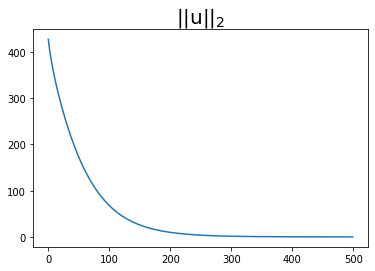

In [15]:
Vmesh,mesh,u,v,u_n,f,u_D,bc= solver_para(nx,ny,tau)
u_star = solver_run(alpha_star,Vmesh,mesh,u,v,u_n,f,u_D,bc,tau, epsilon, num_steps, T)
time_vec = np.linspace(0,T,num_steps)
usquare = np.sum(u_star**2,1)
plt.plot(usquare)
plt.title("$\|\| u\|\|_2$", fontsize=20)

### Rasheed solver 

In [19]:
from solver_rasheed import pred_exponential_time_dg,fenics_essentials_exponential,exponential_time_double_glazing

## Try to run after 
# mesh, V, u, v, f = fenics_essentials_exponential(nx, ny, 1, 0)

# u_rasheed = pred_exponential_time_dg(alpha_star,
#                             tau,
#                             mesh,
#                             V,
#                             u,
#                             v,
#                             f,
#                             epsilon = epsilon,
#                             w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3),
#                             num_steps = num_steps,
#                             T = T,
#                             plot_u=False,
#                             plot_u_t=False)

u_rasheed = exponential_time_double_glazing(alpha_star,
                                    tau,
                                    epsilon = 1/200,
                                    w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3),
                                    num_steps = 50,
                                    T = 5.0,
                                    nx = 10,
                                    ny = 10,
                                    k = 1,
                                    plot_u=False,
                                    plot_u_t=False)

This integral is missing an integration domain.


UFLException: This integral is missing an integration domain.

### Elliot's solver 

Text(0.5, 1.0, '$\\|\\| u\\|\\|_2$')

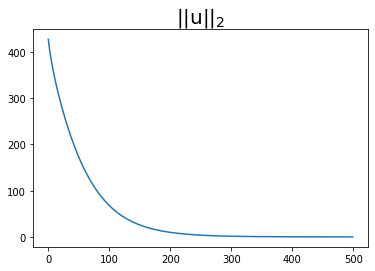

In [23]:
from solver_elliot import time_double_glazing_smooth

u_elliot = time_double_glazing_smooth(tau, epsilon, num_steps, T, nx, ny, 1, alpha_star)
time_vec = np.linspace(0,T,num_steps)
usquare = np.sum(u_star**2,1)
plt.plot(usquare)
plt.title("$\|\| u\|\|_2$", fontsize=20)
